In [2]:
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
TRAIN_PATH = '../input/stage1_train/'
TEST_PATH = '../input/stage1_test/'

In [3]:
# Get train and test IDs
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

In [4]:
# Get and resize train images and masks
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
sizes_train = []
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    sizes_train.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)
    Y_train[n] = mask

# Get and resize test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Getting and resizing test images ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')

Getting and resizing train images and masks ... 


100%|██████████| 670/670 [03:37<00:00,  3.07it/s]

Getting and resizing test images ... 



100%|██████████| 65/65 [00:01<00:00, 36.55it/s]

Done!


In [5]:
x = np.array(sizes_train)

pd.value_counts(x[:,0]*10000+x[:,1])

2560256     334
2560320     112
5200696      92
3600360      91
10241024     16
5120640      13
6031272       6
2600347       5
10401388      1
dtype: int64

In [6]:
y = np.array(sizes_test)

pd.value_counts(y[:,0]*10000+y[:,1])

2560256    24
5120680     8
5120640     8
5190253     4
5200348     4
5200696     4
5240348     4
2600347     4
5190162     2
5190161     2
3900239     1
dtype: int64

 ================= 1 ===============
a984e7fb886aa02e29d112766d3ce26a4f78eac540ce7bbdbd42af2761928f6d


/home/alex/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/alex/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


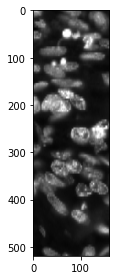

432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580


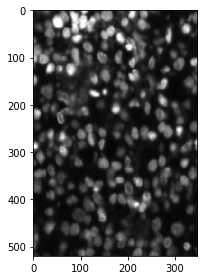

697a05c6fe4a07c601d46da80885645ad574ea19b47ee795ccff216c9f1f1808


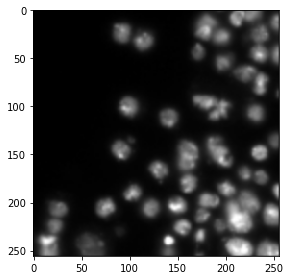

336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523


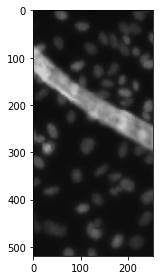

d616d323a9eeb9da1b66f8d5df671d63c092c9919cb2c0b223e29c63257c944d


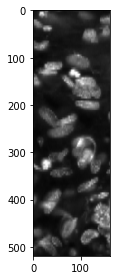

df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8


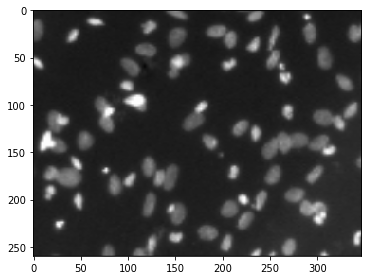

550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18


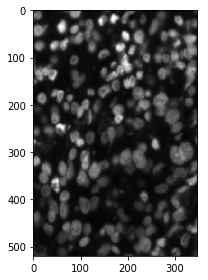

 ================= 2 ===============
44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078


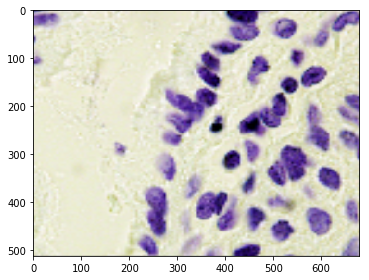

b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3


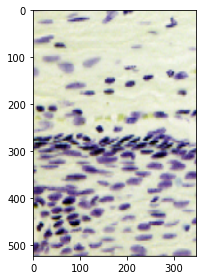

1d9eacb3161f1e2b45550389ecf7c535c7199c6b44b1c6a46303f7b965e508f1


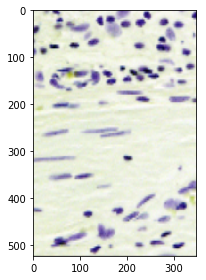

f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb


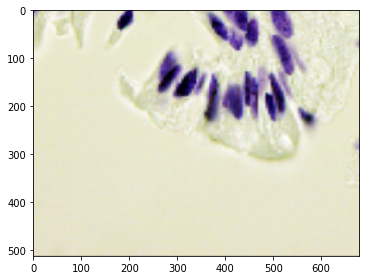

c8e79ff4ac55f4b772057de28e539727b7f4f2a3de73bf7a082a0ace86d609eb


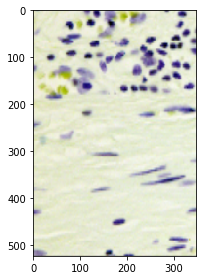

9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab


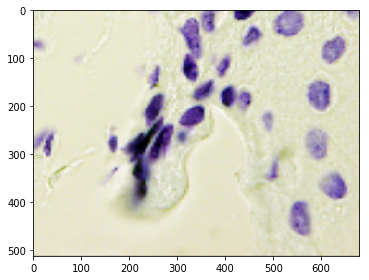

3c4c675825f7509877bc10497f498c9a2e3433bf922bd870914a2eb21a54fd26


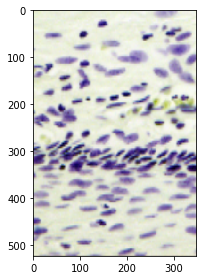

 ================= 3 ===============
1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b


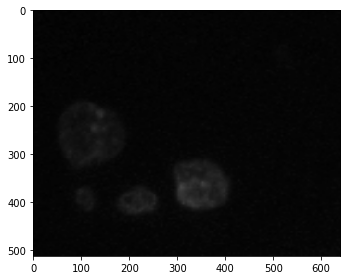

4be73d68f433869188fe5e7f09c7f681ed51003da6aa5d19ce368726d8e271ee


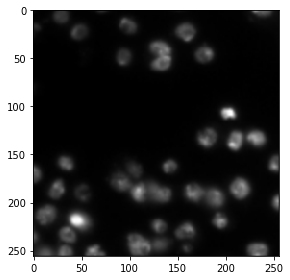

ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef


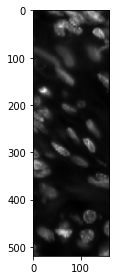

0e132f71c8b4875c3c2dd7a22997468a3e842b46aa9bd47cf7b0e8b7d63f0925


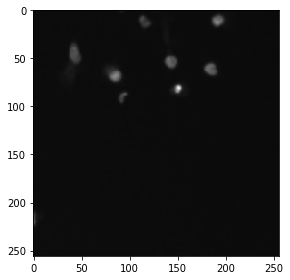

5cee644e5ffbef1ba021c7f389b33bafd3b1841f04d3edd7922d5084c2c4e0c7


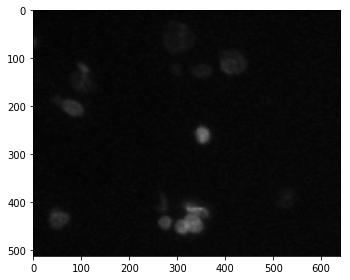

dab46d798d29aff2e99c23f47ed3064f5cafb1644629b015c95a2dd2ee593bb4


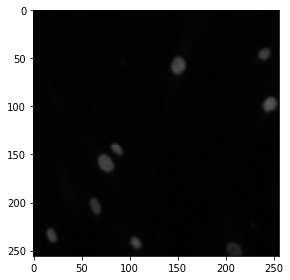

a4816cc1fb76cb3c5e481186833fc0ae9cf426a1406a2607e974e65e9cddba4f


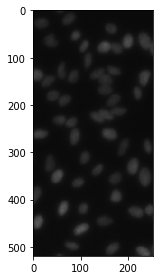

1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c


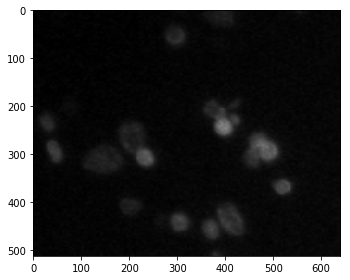

bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d


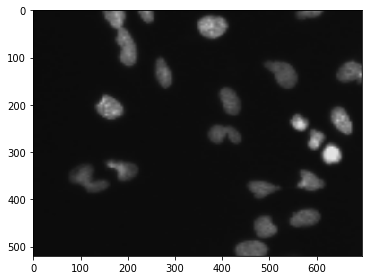

fac507fa4d1649e8b24c195d990f1fc3ca3633d917839e1751a9d412a14ab5e3


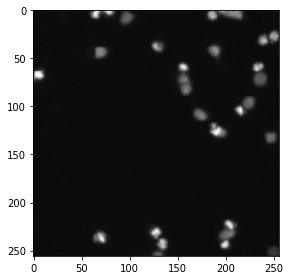

78a981bd27ba0c65a9169548665a17bda9f49050d0d3893a6567d1eb92cd003d


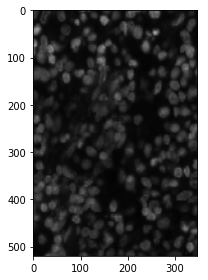

fe9adb627a6f45747c5a8223b671774791ededf9364f6544be487c540107fa4f


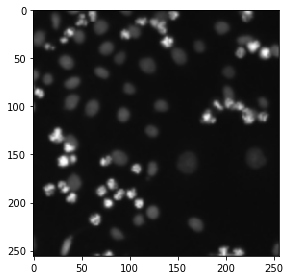

ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8


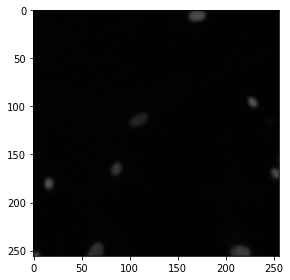

31f1fbe85b8899258ea5bcf5f93f7ac8238660c386aeab40649c715bd2e38a0a


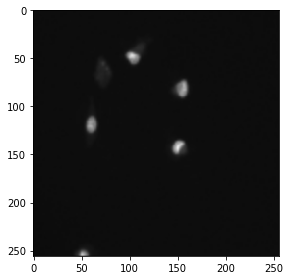

648c8ffa496e1716017906d0bf135debfc93386ae86aa3d4adbda9a505985fd9


/home/alex/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


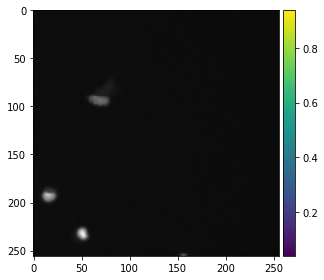

4727d94c6a57ed484270fdd8bbc6e3d5f2f15d5476794a4e37a40f2309a091e2


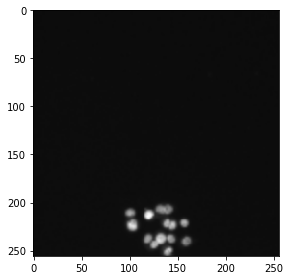

e17b7aedd251a016c01ef9158e6e4aa940d9f1b35942d86028dc1222192a9258


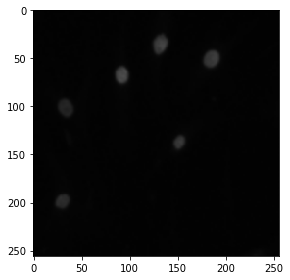

912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea7e460241a23535a406


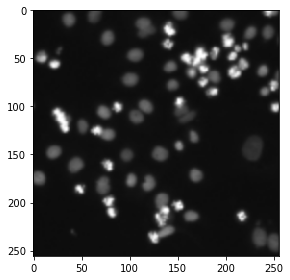

295682d9eb5acb5c1976a460c085734bfaf38482b0a3f02591c2bfdcd4128549


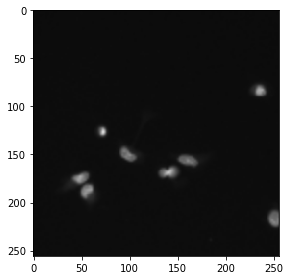

1ef68e93964c2d9230100c1347c328f6385a7bc027879dc3d4c055e6fe80cb3c


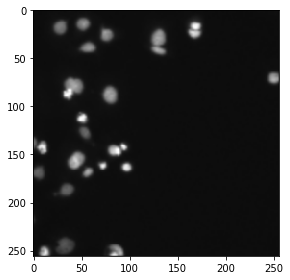

0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732


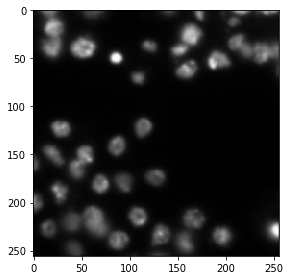

7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04


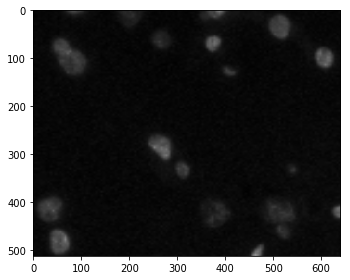

1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e


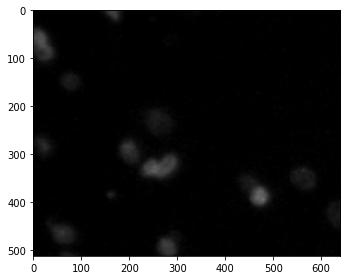

d6eb7ce7723e2f6dc13b90b41a29ded27dbd815bad633fdf582447c686018896


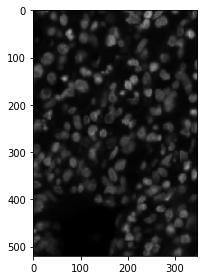

8b59819fbc92eefe45b1db95c0cc3a467ddcfc755684c7f2ba2f6ccb9ad740ab


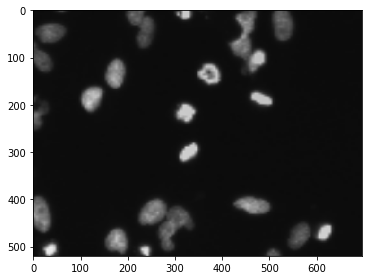

7f4cbe0b36b5d09466476a7d4e01f4f976c67872d549f4ff47b3e1e3a2b403af


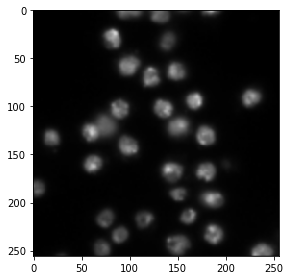

51c70bb8a299943b27f8b354571272692d8f2705036a1a9562156c76da5f025b


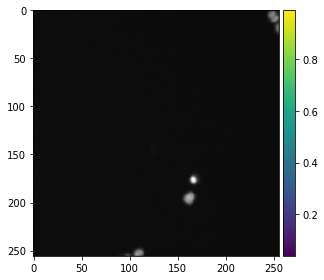

38f5cfb55fc8b048e82a5c895b25fefae7a70c71ab9990c535d1030637bf6a1f


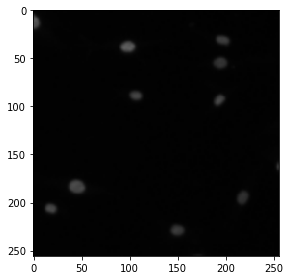

9ab2d381f90b485a68b82bc07f94397a0373e3215ad20935a958738e55f3cfc2


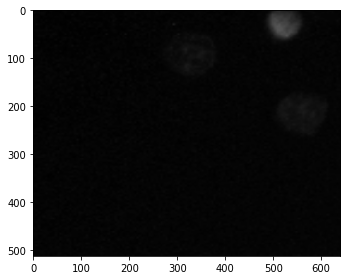

0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5


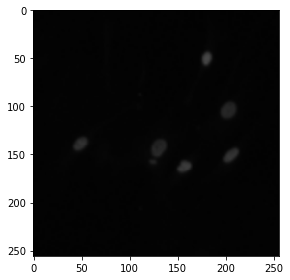

eea70a7948d25a9a791dbcb39228af4ea4049fe5ebdee9c04884be8cca3da835


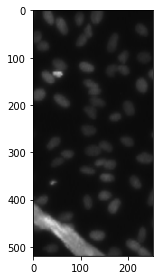

d8d4bf68a76e4e4c5f21de7ac613451f7115a04db686151e78b8ec0b6a22022b


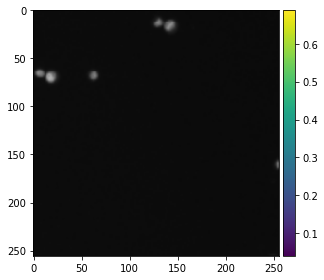

4f949bd8d914bbfa06f40d6a0e2b5b75c38bf53dbcbafc48c97f105bee4f8fac


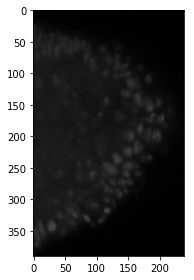

1962d0c5faf3e85cda80e0578e0cb7aca50826d781620e5c1c4cc586bc69f81a


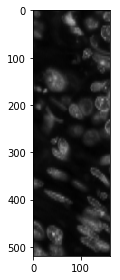

0999dab07b11bc85fb8464fc36c947fbd8b5d6ec49817361cb780659ca805eac


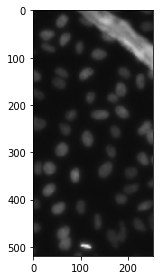

f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4


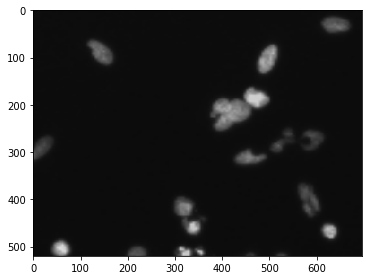

8922a6ac8fd0258ec27738ca101867169b20d90a60fc84f93df77acd5bf7c80b


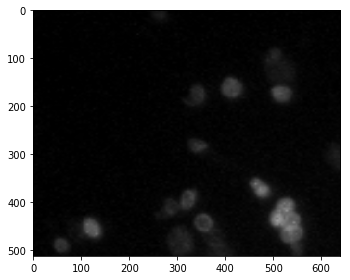

519dc0d672d1c295fc69b629af8721ccb1a1f136d1976685a68487e62547ffe0


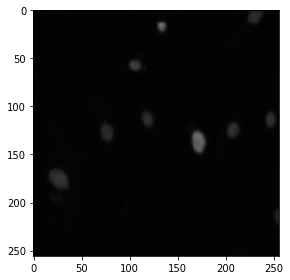

53df5150ee56253fe5bc91a9230d377bb21f1300f443ba45a758bcb01a15c0e4


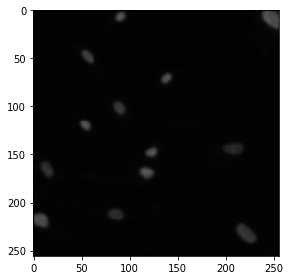

0ed3555a4bd48046d3b63d8baf03a5aa97e523aa483aaa07459e7afa39fb96c6


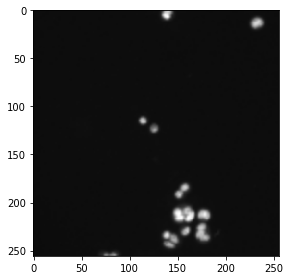

505bc0a3928d8aef5ce441c5a611fdd32e1e8eccdc15cc3a52b88030acb50f81


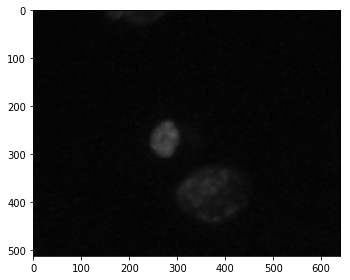

ade080c6618cbbb0a25680cf847f312b5e19b22bfe1cafec0436987ebe5b1e7e


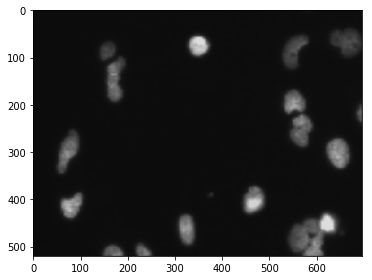

191b2b2205f2f5cc9da04702c5d422bc249faf8bca1107af792da63cccfba829


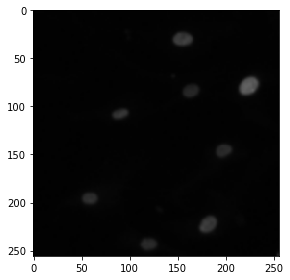

 ================= 4 ===============
52b267e20519174e3ce1e1994b5d677804b16bc670aa5f6ffb6344a0fdf63fde


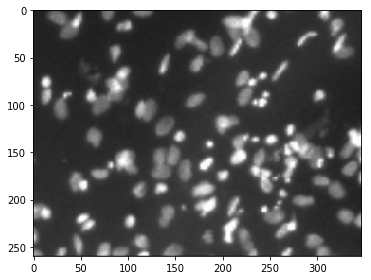

43a71aeb641faa18742cb826772a8566c6c947d7050f9ab15459de6cc2b3b6af


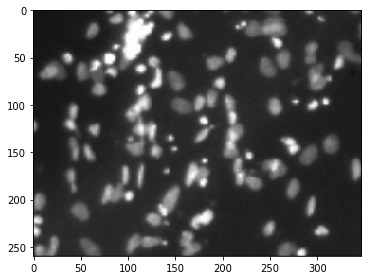

699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68


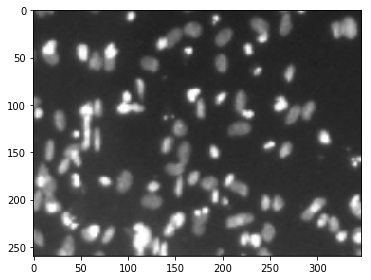

 ================= 5 ===============
472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71


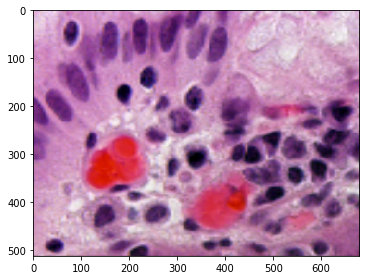

0f1f896d9ae5a04752d3239c690402c022db4d72c0d2c087d73380896f72c466


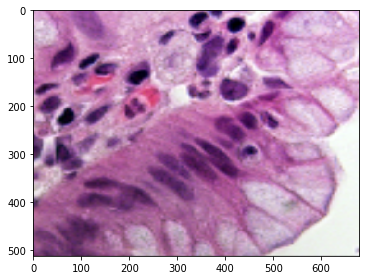

259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4


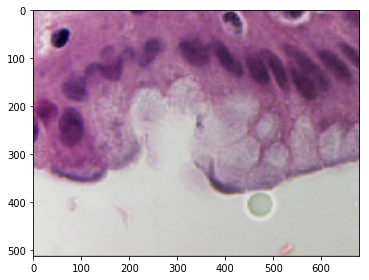

 ================= 6 ===============
da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab


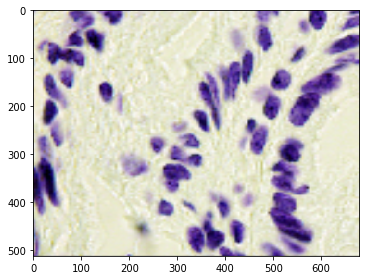

17b9bf4356db24967c4677b8376ac38f826de73a88b93a8d73a8b452e399cdff


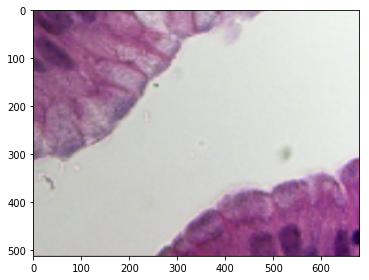

In [78]:
n_colors=6

from sklearn.cluster import KMeans
X_to_clasterize=X_test
ids_to_clasterize=test_ids
sizes_to_clasterize=sizes_test
"""
Xtmp = np.reshape(X_to_clasterize, (X_to_clasterize.shape[0], IMG_HEIGHT*IMG_WIDTH*IMG_CHANNELS))
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(Xtmp)
labels = kmeans.predict(Xtmp)
Xtmp=0
"""
ind=0
for lb in set(labels):
    ind+=1
    print(" ================= " + str(ind) + " ===============")
    for i in range(len(labels)):
        if labels[i]==lb:
            print(ids_to_clasterize[i])
            tmpimg=resize(X_to_clasterize[i],(sizes_to_clasterize[i][0], sizes_to_clasterize[i][1], 3))
            imshow(tmpimg)
            plt.show()
